<a href="https://colab.research.google.com/github/tulaycetin/Eksik_Versi_Temizleme/blob/main/Veri%C3%96ni%C5%9Fleme_Eksikveri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Veri Setini Tanıyalım

In [23]:
# Gerekli kütüphanelerin yüklenmesi
import kagglehub
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [24]:
# Veri Setini İndirme ve Ön İnceleme
# ---------------------------
# Kaggle veri setini indiriyoruz.
path = kagglehub.dataset_download("maxhorowitz/nflplaybyplay2009to2016")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/maxhorowitz/nflplaybyplay2009to2016/versions/6


**Kaggle’dan NFL Play-by-Play (2009-2016) veri seti indirilir. Bu veri seti, NFL maçlarındaki her bir oyun anını detaylı olarak içerir.**



*   Bu veri seti, NFL maçlarındaki oyunların detaylı verilerini içerdiğinden, maçın kazanılıp kazanılmaması (örneğin, win probability) gibi durumların analizine olanak tanır.




In [25]:
# CSV dosyasını okuyoruz.
df = pd.read_csv(path + '/NFL Play by Play 2009-2017 (v4).csv')
print("İlk 5 satır:")
print(df.head())

<ipython-input-25-62ee87502347>:2: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path + '/NFL Play by Play 2009-2017 (v4).csv')


İlk 5 satır:
         Date      GameID  Drive  qtr  down   time  TimeUnder  TimeSecs  \
0  2009-09-10  2009091000      1    1   NaN  15:00         15    3600.0   
1  2009-09-10  2009091000      1    1   1.0  14:53         15    3593.0   
2  2009-09-10  2009091000      1    1   2.0  14:16         15    3556.0   
3  2009-09-10  2009091000      1    1   3.0  13:35         14    3515.0   
4  2009-09-10  2009091000      1    1   4.0  13:27         14    3507.0   

   PlayTimeDiff SideofField  ...    yacEPA  Home_WP_pre  Away_WP_pre  \
0           0.0         TEN  ...       NaN     0.485675     0.514325   
1           7.0         PIT  ...  1.146076     0.546433     0.453567   
2          37.0         PIT  ...       NaN     0.551088     0.448912   
3          41.0         PIT  ... -5.031425     0.510793     0.489207   
4           8.0         PIT  ...       NaN     0.461217     0.538783   

   Home_WP_post  Away_WP_post  Win_Prob       WPA    airWPA    yacWPA  Season  
0      0.546433      0.

In [26]:
# Eksik değer sayısı
print("Eksik değerler:")
print(df.isna().sum())

Eksik değerler:
Date             0
GameID           0
Drive            0
qtr              0
down         61154
             ...  
Win_Prob     25009
WPA           5541
airWPA      248501
yacWPA      248762
Season           0
Length: 102, dtype: int64


# Veri Setini Anlamak
⚖

 Veri setinde 102 adet sütun var. 407688 adet satır (gözlem) bulunuyor.

33 sütun, ondalık sayılar (float64) içeriyor.
31 sütun, tam sayılar (int64) içeriyor.
38 sütun ise genellikle metin (object) veriler içeriyor.

In [27]:
# Veri setinin 10,000 rastgele gözlemini alıyoruz.
df = df.sample(n=10000, random_state=42)
print("Yeni örneklem boyutu:", df.shape)

Yeni örneklem boyutu: (10000, 102)


In [28]:
df.isna().sum()

,0
Date,0
GameID,0
Drive,0
qtr,0
down,1465
...,...
Win_Prob,620
WPA,122
airWPA,6099
yacWPA,6103


In [29]:
# Eksik veri oranı hesaplama
missing_ratio = df.isna().sum() / len(df)


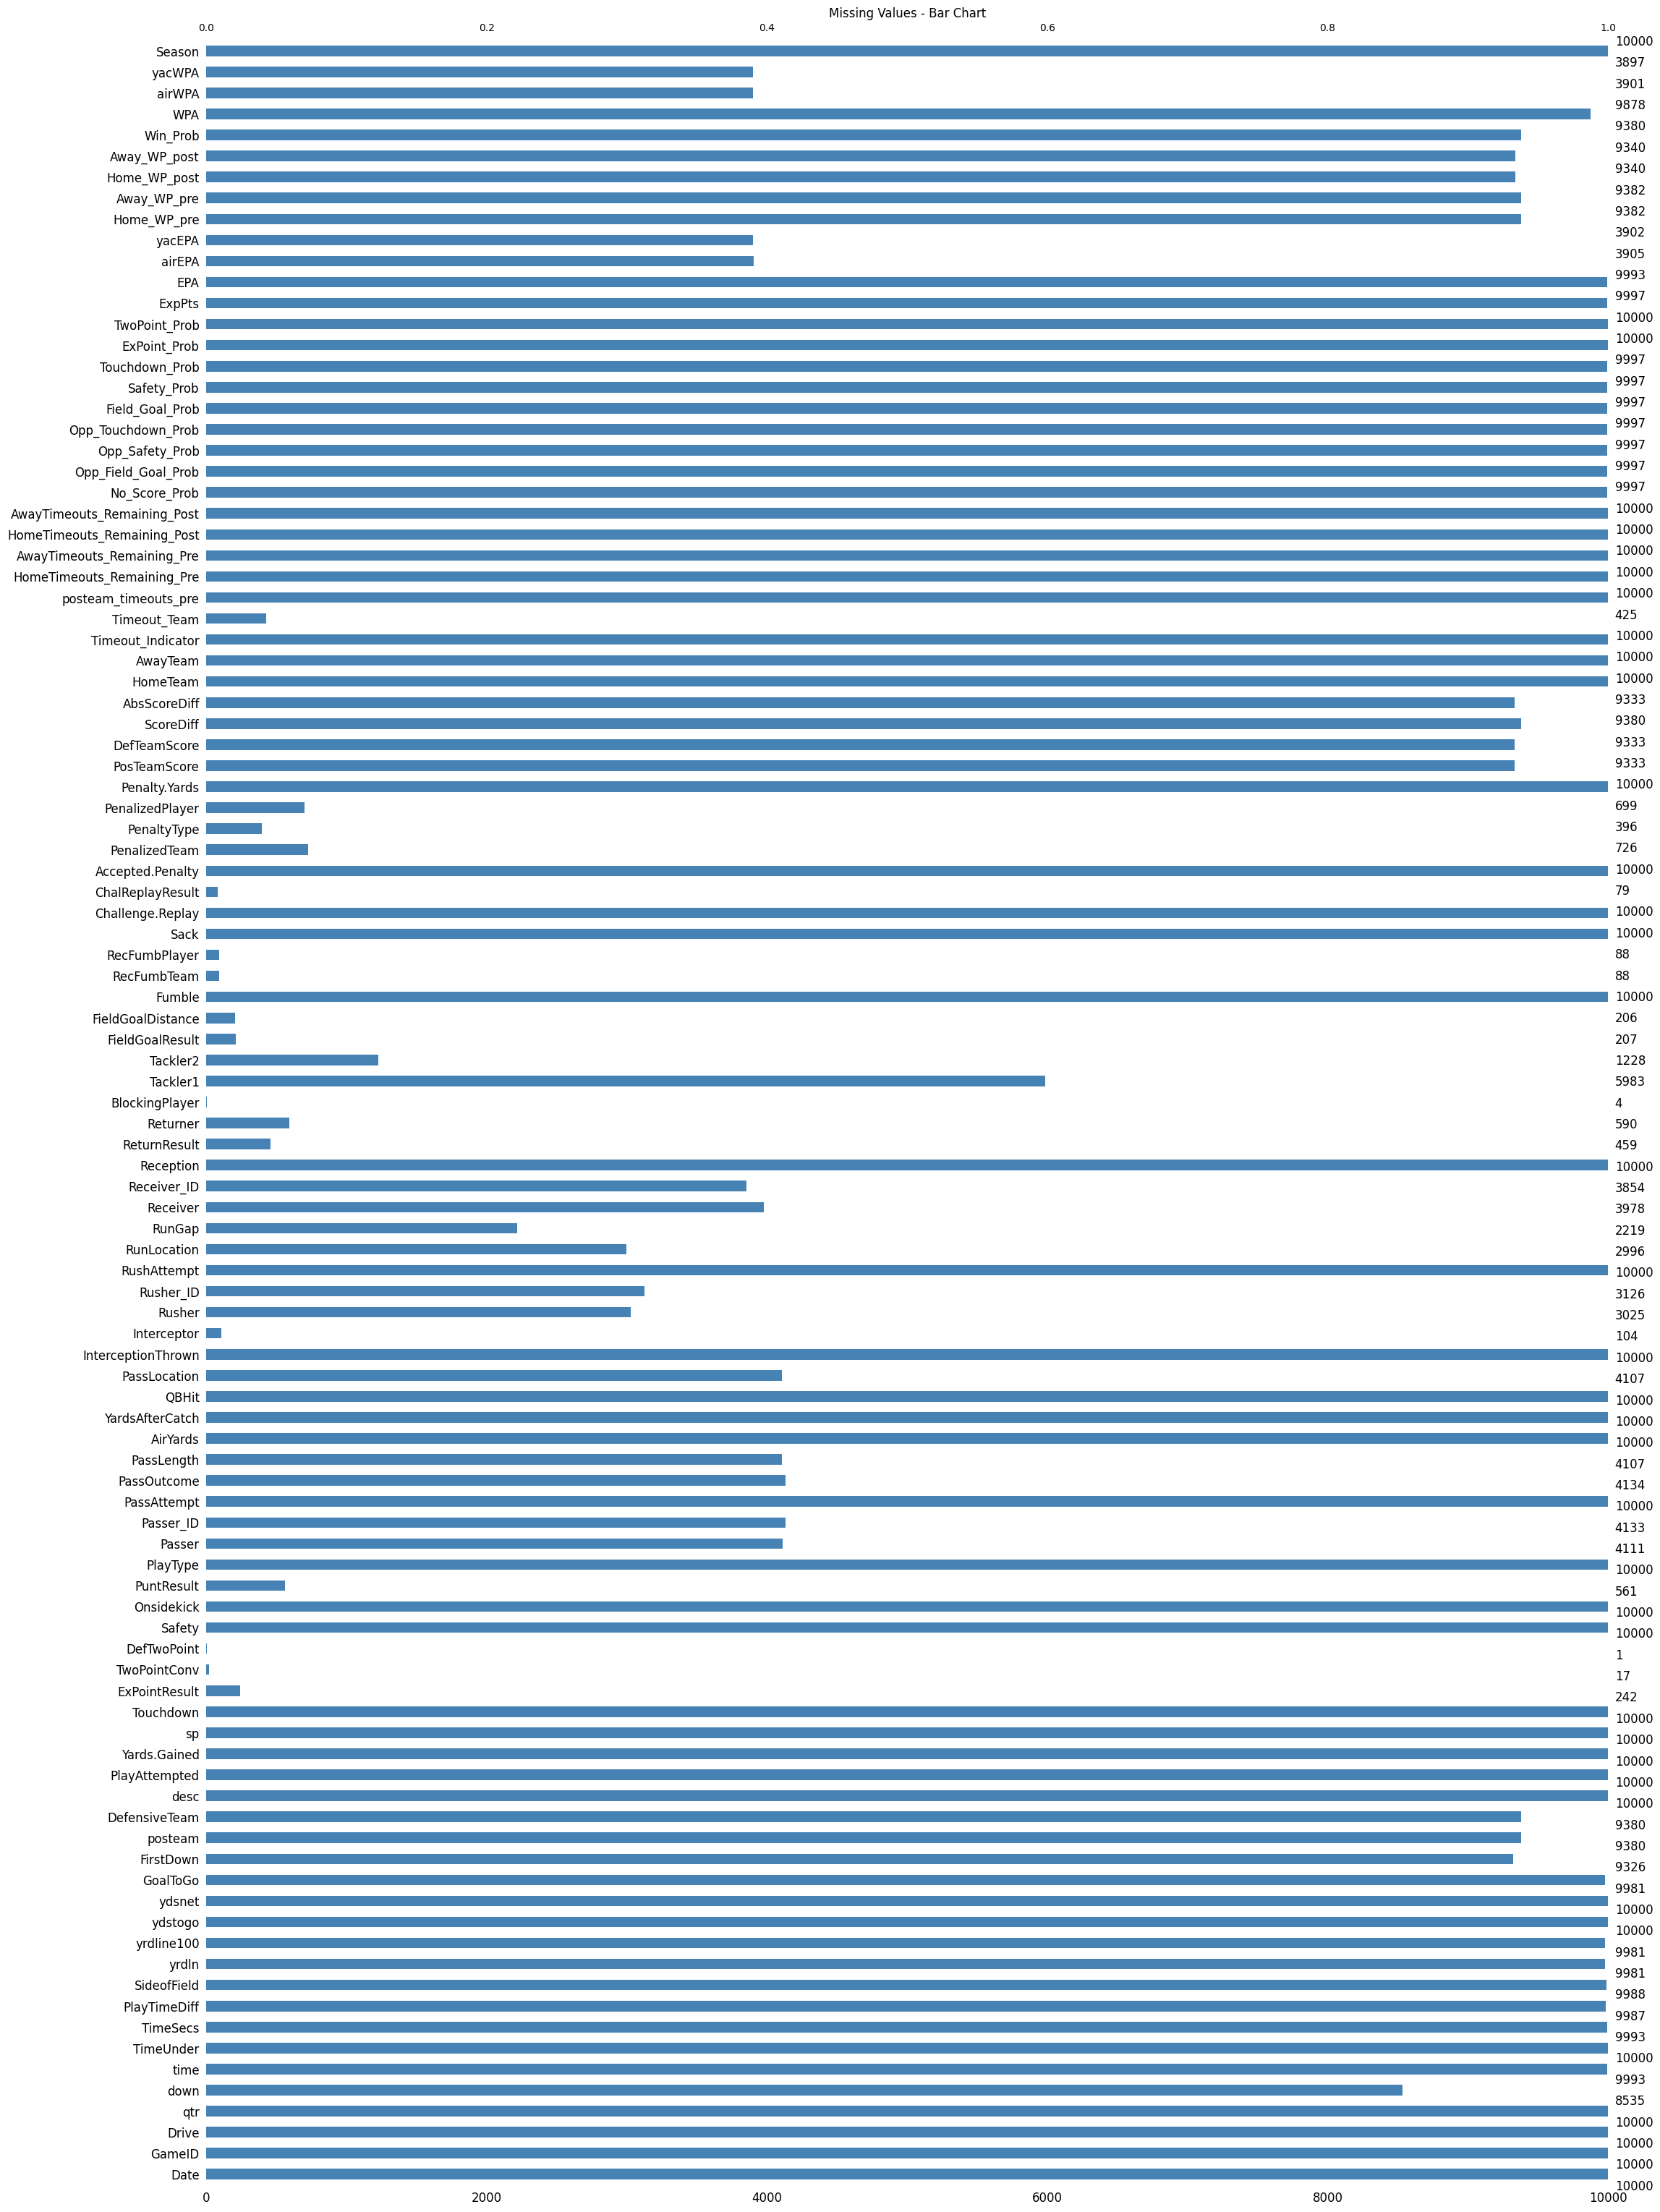

In [30]:
# Eksik değer görselleştirmeleri:
plt.figure(figsize=(10, 5))
msno.bar(df, fontsize=12, color='steelblue')
plt.title('Missing Values - Bar Chart')
plt.show()




#Maximum Likelihood İmputasyonu ile Eksik Değer Doldurma





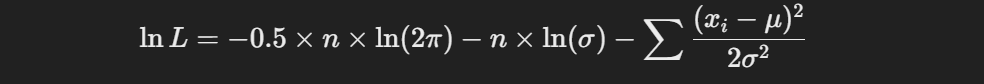

In [31]:
df_ml=df.copy()

Bu kod parçası, verinin normal dağıldığı varsayımını kabul ederek, veriye en uygun mu ve sigma değerlerini MLE yöntemiyle hesaplar.

In [32]:
# Maximum Likelihood (MLE) ile eksik veri doldurma
np.random.seed(42)
sample_data = np.random.normal(loc=5, scale=2, size=100)

def neg_log_likelihood(params, data):
    mu, sigma = params[0], params[1]
    if sigma <= 0:
        return np.inf  # sigma negatif olamaz
    n = len(data)
    ll = -0.5 * n * np.log(2 * np.pi) - n * np.log(sigma) - np.sum((data - mu)**2) / (2 * sigma**2)
    return -ll

initial_params = [np.mean(sample_data), np.std(sample_data, ddof=0)]
result = minimize(neg_log_likelihood, initial_params, args=(sample_data,))
mu_MLE, sigma_MLE = result.x

print("MLE ile tahmin edilen mu:", mu_MLE)
print("MLE ile tahmin edilen sigma:", sigma_MLE)



MLE ile tahmin edilen mu: 4.792306965211812
MLE ile tahmin edilen sigma: 1.8072323532892591




  ** Eksik veriler MLE yöntemiyle tahmin edilen normal dağılım parametrelerine dayanarak doldurulur ve sonuç olarak temizlenmiş bir veri seti oluşturulmuş olur. Bu veri seti daha sonra analiz veya modelleme çalışmalarında kullanılmak üzere CSV dosyasına kaydedilir.**



In [33]:
# Eksik değerleri doldurmak için fonksiyon
def impute_value(val):
    if pd.isna(val):
        return np.random.normal(mu_MLE, sigma_MLE)
    return val

# Tüm veri seti üzerinde Maximum Likelihood imputasyonunu (applymap) uyguluyoruz.
df_ml = df_ml.applymap(impute_value)

print("Maximum Likelihood imputasyon sonrası eksik değer sayısı:")
print(df_ml.isnull().sum())

# İmpute edilmiş veri setini kopyalayarak kaydediyoruz.
LikeHodd_veriSeti = df_ml.copy()
LikeHodd_veriSeti.to_csv("LikeHood.csv", index=False)

<ipython-input-33-b610d4a8062e>:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_ml = df_ml.applymap(impute_value)


Maximum Likelihood imputasyon sonrası eksik değer sayısı:
Date        0
GameID      0
Drive       0
qtr         0
down        0
           ..
Win_Prob    0
WPA         0
airWPA      0
yacWPA      0
Season      0
Length: 102, dtype: int64


In [34]:
# Hedef değişkeni y olarak atıyoruz. Bu sütun, maç kazanma olasılığını 0 ile 1 arasında bir değer olarak temsil eder.
y_likehood = LikeHodd_veriSeti[['Win_Prob']]

# Özellikler: 'Win_Prob', 'Date', 'time' sütunları dışındaki tüm sütunlar seçilir.
X_likehood = LikeHodd_veriSeti.drop(columns=['Win_Prob', 'Date', 'time'])



**Bu işlem, modelin aşırı karmaşık veya gereksiz bilgi içeren sütunlardan etkilenmemesi için yapılır. **

In [35]:
# Kategorik sütunları belirliyoruz.
cat_cols = X_likehood.select_dtypes(include=['object']).columns.tolist()

# Benzersiz değer sayısı 100'den fazla olan sütunları seçiyoruz.
high_card_cols = [col for col in cat_cols if X_likehood[col].nunique() > 100]

# Yüksek kardinaliteli sütunları veri setinden çıkarıyoruz.
X_likehood = X_likehood.drop(columns=high_card_cols)


#MICE İle İmputation (Sadece Sayısal Sütunlar Üzerinde)



*   Bu kod parçası, eksik değerleri MICE benzeri bir yaklaşımla (IterativeImputer) doldurarak yalnızca sayısal sütunlardan oluşan bir veri seti oluşturur.
*  **IterativeImputer modülü,** eksik verileri diğer sütunlarla ilişkisini göz önüne alarak iteratif şekilde doldurmak için kullanılır (MICE metoduna benzer).


In [36]:
from sklearn.experimental import enable_iterative_imputer  # IterativeImputer'ı etkinleştirir.
from sklearn.impute import IterativeImputer

# Sadece sayısal sütunları seçiyoruz.
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_cols]

imputer = IterativeImputer(random_state=42)
df_numeric_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=numeric_cols) #İmputer, df_numeric üzerindeki eksik verileri diğer sütunlarla ilişki kurarak doldurur.

print("\nMICE sonrası ilk 5 satır:")
print(df_numeric_imputed.head())

# İmpute edilmiş sayısal veri setini kopyalıyoruz.
Mice_veriSeti = df_numeric_imputed.copy()
Mice_veriSeti.to_csv("MİCE.csv", index=False)


MICE sonrası ilk 5 satır:
         GameID  Drive  qtr      down  TimeUnder  TimeSecs  PlayTimeDiff  \
0  2.011122e+09    7.0  2.0  2.000000       15.0    2700.0           0.0   
1  2.015122e+09   22.0  4.0  1.000000        2.0     109.0           0.0   
2  2.012111e+09   18.0  4.0  4.045154       15.0     849.0           5.0   
3  2.017100e+09    9.0  2.0  3.430444        1.0    1843.0           8.0   
4  2.017100e+09   14.0  3.0  1.000000       12.0    1573.0          39.0   

   yrdln  yrdline100  ydstogo  ...    yacEPA  Home_WP_pre  Away_WP_pre  \
0   21.0        79.0     23.0  ...  0.728057     0.310828     0.689172   
1   11.0        11.0     10.0  ... -0.427087     0.996070     0.003930   
2   35.0        35.0      0.0  ... -0.534975     0.000626     0.999374   
3   31.0        31.0      0.0  ... -0.680803     0.529394     0.470930   
4   44.0        56.0     10.0  ... -0.608736     0.053402     0.946598   

   Home_WP_post  Away_WP_post  Win_Prob       WPA    airWPA    yacWPA  

In [37]:
y_mice = Mice_veriSeti[['Win_Prob']]
X_Mice = Mice_veriSeti.drop(columns=['Win_Prob'])

## EM Algoritması ile eksik veri doldurma

*   Beklenti adımında kayıp veriler yerine regresyon tahminleriyle yaklaşık değerler atanır.

*   Maksimizasyon adımında ise tamamlanmış olan veri üzerinden tahminler yenilenir.



In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer

"""GaussianMixture: Gaussian Mixture Model (GMM) kullanarak verinin dağılımını modellemek için.
    SimpleImputer: İlk etapta, eksik değerleri sütun ortalamalarıyla doldurmak için kullanılır."""


# Sadece sayısal sütunları seçiyoruz.
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_cols].copy()

# İlk adım: eksik değerleri sütun ortalamalarıyla dolduruyoruz
imputer = SimpleImputer(strategy="mean")
data_imputed = imputer.fit_transform(df_numeric)

# Gaussian Mixture Model (tek bileşenli; temelde normal dağılım) ile modelleme
gmm = GaussianMixture(n_components=1, max_iter=50, random_state=42)
gmm.fit(data_imputed)

# Eksik Değerlerin Tespit Edilmesi ve GMM'den Örnekleyerek Doldurulması
missing_rows, missing_cols = np.where(np.isnan(df_numeric)) # df_numeric içerisinde hala eksik (NaN) değerlerin konumlarını tespit eder.
for row, col in zip(missing_rows, missing_cols):
    df_numeric.iloc[row, col] = gmm.sample(1)[0][0, col] #gmm.sample(1) kullanılarak, GMM modelinden ilgili sütun için yeni bir örnek değeri çekilir.
df_beklenti = pd.DataFrame(df_numeric)




In [39]:
# Hedef değişkeni y olarak atıyoruz.Bu sütun, maç kazanma olasılığını 0 ile 1 arasında bir değer olarak temsil eder.
y_EM = df_beklenti[['Win_Prob']]

# Özellikler (X): 'Win_Prob', 'Date', 'time' sütunları dışındaki tüm sütunlar
X_EM = df_beklenti.drop(columns=['Win_Prob'])


\


# Linner Model Eğitimi

In [40]:
def LineerModel(X, y, threshold=0.5):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
   # Kategorik değişkenler için one-hot encoding
    X_train_enc = pd.get_dummies(X_train, drop_first=True)
    X_test_enc = pd.get_dummies(X_test, drop_first=True)
    X_train_enc, X_test_enc = X_train_enc.align(X_test_enc, join='left', axis=1, fill_value=0)

    # Linear Regression modelini eğitiyoruz.
    lr = LinearRegression()
    lr.fit(X_train_enc, y_train)
    y_pred = lr.predict(X_test_enc)

    # Regresyon metriklerini hesaplıyoruz.
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Regression Metrics:")
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R^2 Score:", r2)


    # Binary sınıflandırma değerlendirmesi
    y_pred_binary = (y_pred >= threshold).astype(int)
    y_test_binary = (y_test.values >= threshold).astype(int)
    cm = confusion_matrix(y_test_binary, y_pred_binary)
    print("\nConfusion Matrix:\n", cm)
    acc = accuracy_score(y_test_binary, y_pred_binary)
    print("Accuracy Score:", acc)
    print("\nClassification Report:\n", classification_report(y_test_binary, y_pred_binary))


    # Hem regresyon hem de sınıflandırma sonuçlarını döndürüyoruz.
    return lr


In [41]:
# Model eğitimi
print("\n--- Maximum Likelihood Model Eğitimi ---")
LineerModel(X_likehood, y_likehood)



--- Maximum Likelihood Model Eğitimi ---
Regression Metrics:
Mean Squared Error (MSE): 16.179314549300095
Mean Absolute Error (MAE): 0.288404049847858
R^2 Score: -11.939243148215292

Confusion Matrix:
 [[807 105]
 [119 969]]
Accuracy Score: 0.888

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88       912
           1       0.90      0.89      0.90      1088

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000



LinearRegression()

In [42]:
print("\n--- MICE Model Eğitimi ---")
LineerModel(X_Mice, y_mice)


--- MICE Model Eğitimi ---
Regression Metrics:
Mean Squared Error (MSE): 0.009028668429465536
Mean Absolute Error (MAE): 0.06115212944884111
R^2 Score: 0.8859663553100687

Confusion Matrix:
 [[972  64]
 [ 24 940]]
Accuracy Score: 0.956

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96      1036
           1       0.94      0.98      0.96       964

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



LinearRegression()

In [43]:
print("\n--- EM Model Eğitimi ---")

LineerModel(X_EM, y_EM)



--- EM Model Eğitimi ---
Regression Metrics:
Mean Squared Error (MSE): 0.009110343803403295
Mean Absolute Error (MAE): 0.06194478706675693
R^2 Score: 0.8900430448589823

Confusion Matrix:
 [[ 850   62]
 [  24 1064]]
Accuracy Score: 0.957

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       912
           1       0.94      0.98      0.96      1088

    accuracy                           0.96      2000
   macro avg       0.96      0.95      0.96      2000
weighted avg       0.96      0.96      0.96      2000



LinearRegression()